In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import datasets
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
tf.__version__

In [ ]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
!nvidia-smi

In [34]:
x_data = []
y_data = []

In [32]:
batch_size = 32
img_height = 180
img_width = 180

In [35]:
for name in os.listdir("c:/Users/Umpalumpa/Desktop/Sariema_IA/All_FIles_Merge"):
    for s_name in os.listdir("c:/Users/Umpalumpa/Desktop/Sariema_IA/All_FIles_Merge/" + name):
        #imread = cv2.imread("c:/Users/Umpalumpa/Desktop/Sariema_IA/All_FIles_Merge/" + name + "/" + s_name)
        #resized = cv2.resize(imread, (100, 120))
        img_open = open("c:/Users/Umpalumpa/Desktop/Sariema_IA/All_FIles_Merge/" + name + "/" + s_name, "rb")
        read_img = img_open.read()        
        image_decode = tf.image.decode_jpeg(read_img)
        #resized = tf.image.resize(image_decode, [28, 28])
        x_data.append(image_decode)
        y_data.append(name)


In [37]:
data_dir = "c:/Users/Umpalumpa/Desktop/Sariema_IA/All_FIles_Merge"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1280 files belonging to 32 classes.
Using 1024 files for training.


In [38]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1280 files belonging to 32 classes.
Using 256 files for validation.


In [39]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '4', '5', '7', '9', 'A', 'ADULTO', 'AVIAO', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'PALAVRA', 'PEQUENO', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


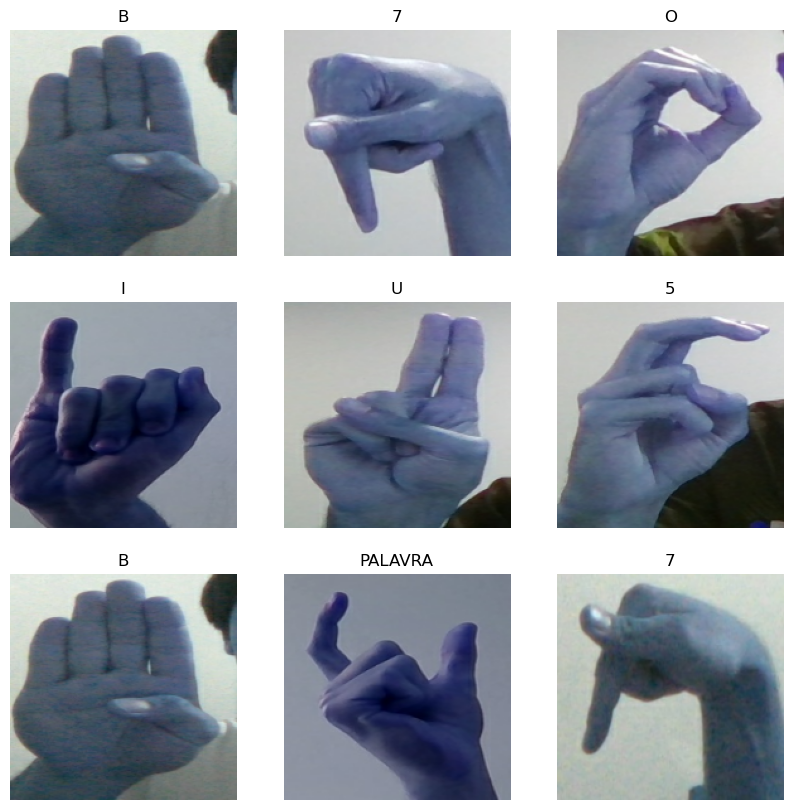

In [40]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [41]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [42]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [45]:
normalization_layer = layers.Rescaling(1./255)


In [46]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.083344825 0.8852942


In [47]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [49]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

In [50]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 12s 316ms/step - loss: 3.3700 - accuracy: 0.1279 - val_loss: 2.9496 - val_accuracy: 0.2383
Epoch 2/10
32/32 [==============================] - 10s 299ms/step - loss: 1.5784 - accuracy: 0.6113 - val_loss: 0.7637 - val_accuracy: 0.7852
Epoch 3/10
32/32 [==============================] - 10s 313ms/step - loss: 0.1904 - accuracy: 0.9512 - val_loss: 0.2318 - val_accuracy: 0.9297
Epoch 4/10
32/32 [==============================] - 10s 304ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0693 - val_accuracy: 0.9883
Epoch 5/10
32/32 [==============================] - 10s 298ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9883
Epoch 6/10
32/32 [==============================] - 10s 298ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 7/10
32/32 [==============================] - 10s 312ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9883

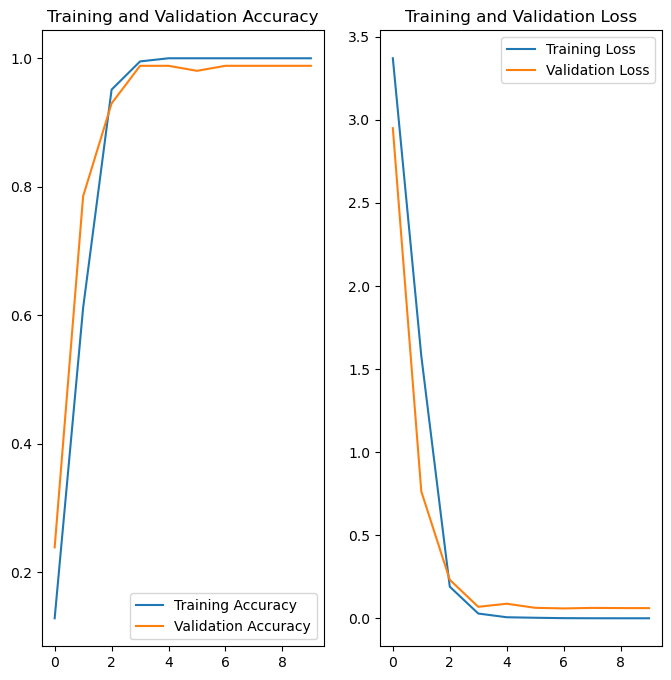

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [52]:

sunflower_path = "C:/Users/Umpalumpa/Desktop/Sariema_IA/handSighnDetectionMediaPipe/Data/Fold3/2/222.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 334ms/step
This image most likely belongs to 2 with a 99.99 percent confidence.
